In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('joblistings.csv')

In [3]:
data.head()

,Unnamed: 0,job title,company_name,skills_required,experience,location
0,0,\rSenior Consultant - Data science,Analytics Vidhya,"visualization,business requirements,data scien...",6 - 9 yrs,Bengaluru / Bangalore
1,1,Data and Feed Specialist,lastminute.com group,"mobile,team player,Productsup",0 - 3 yrs,Switzerland
2,2,\rInside Sales- Data Analytics,The Higher Pitch,"demand generation,campaigns,webinar,performanc...",2 - 6 yrs,Noida/Greater Noida
3,3,Data Engineer - Search - Link,Veeva Systems,"algorithms,lucene,elastic search,apache,java,s...",0 - 3 yrs,Spain
4,4,\rVeeva Systems - Data Engineer,Veeva Systems,"algorithms,apache,java,san,python,machine lear...",0 - 3 yrs,Spain


### Data Cleaning

In [4]:
data.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
data['experience'] = data['experience'].str.replace(" ","", regex = True)
data['job title'] = data['job title'].str.replace("\r","", regex = True)

In [6]:
data

,job title,company_name,skills_required,experience,location
0,Senior Consultant - Data science,Analytics Vidhya,"visualization,business requirements,data scien...",6-9yrs,Bengaluru / Bangalore
1,Data and Feed Specialist,lastminute.com group,"mobile,team player,Productsup",0-3yrs,Switzerland
2,Inside Sales- Data Analytics,The Higher Pitch,"demand generation,campaigns,webinar,performanc...",2-6yrs,Noida/Greater Noida
3,Data Engineer - Search - Link,Veeva Systems,"algorithms,lucene,elastic search,apache,java,s...",0-3yrs,Spain
4,Veeva Systems - Data Engineer,Veeva Systems,"algorithms,apache,java,san,python,machine lear...",0-3yrs,Spain
...,...,...,...,...,...
77495,Senior Software Engineer-Technology,cardekho.com,"senior software engineer,sql,elastic search,da...",3-5yrs,Gurgaon
77496,Digital Marketing,cirkle studio pvt ltd,"digital marketing,social media,Web Analytics",2-5yrs,Surat
77497,"VP ,Treaty Underwriting",QBE Insurance Group Limited,"accounting,loss,legal,forecasting,budget plann...",7-10yrs,NaN
77498,Business Analyst With IIBA,WHITE FORCE,"information technology,java,system development...",7-10yrs,Gurgaon


In [7]:
data['experience'] = data['experience'].str.rstrip('yrs')
data[['min_exp', 'max_exp']] = data["experience"].str.split("-", n = 1, expand = True)
data[["min_exp", "max_exp"]] = data[["min_exp", "max_exp"]].apply(pd.to_numeric)

In [8]:
data

,job title,company_name,skills_required,experience,location,min_exp,max_exp
0,Senior Consultant - Data science,Analytics Vidhya,"visualization,business requirements,data scien...",6-9,Bengaluru / Bangalore,6,9
1,Data and Feed Specialist,lastminute.com group,"mobile,team player,Productsup",0-3,Switzerland,0,3
2,Inside Sales- Data Analytics,The Higher Pitch,"demand generation,campaigns,webinar,performanc...",2-6,Noida/Greater Noida,2,6
3,Data Engineer - Search - Link,Veeva Systems,"algorithms,lucene,elastic search,apache,java,s...",0-3,Spain,0,3
4,Veeva Systems - Data Engineer,Veeva Systems,"algorithms,apache,java,san,python,machine lear...",0-3,Spain,0,3
...,...,...,...,...,...,...,...
77495,Senior Software Engineer-Technology,cardekho.com,"senior software engineer,sql,elastic search,da...",3-5,Gurgaon,3,5
77496,Digital Marketing,cirkle studio pvt ltd,"digital marketing,social media,Web Analytics",2-5,Surat,2,5
77497,"VP ,Treaty Underwriting",QBE Insurance Group Limited,"accounting,loss,legal,forecasting,budget plann...",7-10,NaN,7,10
77498,Business Analyst With IIBA,WHITE FORCE,"information technology,java,system development...",7-10,Gurgaon,7,10


In [9]:
data['job title1'] = data['job title'].str.contains('Data')

In [10]:
new = data[data['job title1'] != False]
new = pd.DataFrame(new)

In [11]:
new['python'] = new['skills_required'].str.contains('python')
new['sql'] = new['skills_required'].str.contains('sql')
new['data'] = new['skills_required'].str.contains('data')
new['nosql'] = new['skills_required'].str.contains('nosql')
new_data = new[['min_exp', 'max_exp', 'python', 'sql', 'data', 'nosql']]

In [12]:
py = new_data['python'].value_counts()[1]
sql = new_data['sql'].value_counts()[1]
dat = new_data['data'].value_counts()[1]
nosql = new_data['nosql'].value_counts()[1]
skills = [py, sql, dat, nosql]

In [13]:
#skills = pd.DataFrame({'python':py, 'sql': sql, 'data_related': dat, 'nosql':nosql})
skills = pd.DataFrame({'skill':['python', 'sql', 'data_related', 'nosql'],
                      'frequency':skills},)

In [14]:
skills

,skill,frequency
0,python,1647
1,sql,2318
2,data_related,2661
3,nosql,588


<AxesSubplot:title={'center':'Skills Required for Data Science Job'}, ylabel='frequency'>

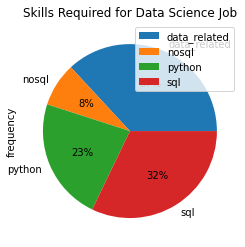

In [15]:
skills.groupby(['skill']).sum().plot(kind='pie', x= 'skill',y='frequency', autopct='%1.0f%%', title = 'Skills Required for Data Science Job')

In [16]:
new_data = new_data*1
new_data

,min_exp,max_exp,python,sql,data,nosql
0,6,9,0,0,1,0
1,0,3,0,0,0,0
2,2,6,0,0,0,0
3,0,3,1,0,0,0
4,0,3,1,0,0,0
...,...,...,...,...,...,...
77158,0,3,0,1,1,0
77297,4,6,0,0,0,0
77448,0,3,0,0,1,0
77451,4,7,0,1,1,0


In [17]:
new_data.corr()

,min_exp,max_exp,python,sql,data,nosql
min_exp,1.000000,0.946826,0.072417,0.145007,0.102789,0.097092
max_exp,0.946826,1.000000,0.074953,0.140409,0.097510,0.127008
python,0.072417,0.074953,1.000000,0.438125,0.106526,0.235903
sql,0.145007,0.140409,0.438125,1.000000,0.302735,0.406062
data,0.102789,0.097510,0.106526,0.302735,1.000000,0.135135
nosql,0.097092,0.127008,0.235903,0.406062,0.135135,1.000000


Text(0, 0.5, 'Frequency')

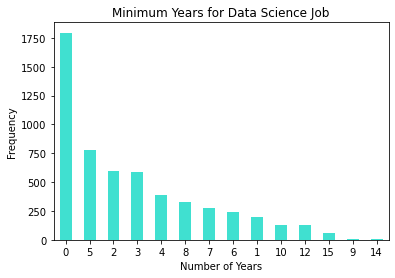

In [18]:
plot1 = new_data['min_exp'].value_counts().plot(kind='bar', title = "Minimum Years for Data Science Job", rot = 0, color = 'turquoise')
plot1.set_xlabel("Number of Years")
plot1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

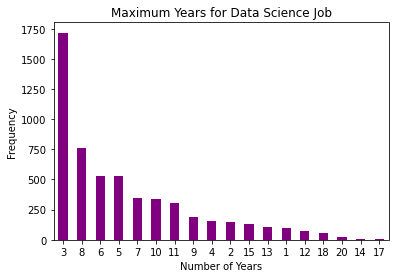

In [19]:
plot2 = new_data['max_exp'].value_counts().plot(kind='bar', title = "Maximum Years for Data Science Job", color = 'purple', rot = 0)
plot2.set_xlabel("Number of Years")
plot2.set_ylabel("Frequency")

In [20]:
new_data['max_exp'].value_counts()

3     1717
8      757
6      527
5      526
7      350
10     337
11     308
9      190
4      159
2      150
15     130
13     110
1      100
12      70
18      60
20      20
14      10
17      10
Name: max_exp, dtype: int64

In [21]:
new_data['min_exp'].value_counts()

0     1795
5      777
2      595
3      587
4      390
8      328
7      279
6      240
1      200
10     130
12     130
15      60
9       10
14      10
Name: min_exp, dtype: int64

In [22]:
len(new_data)

5531

In [24]:
new['company_name'].value_counts()

Cognizant Technology Solutions     240
Analytics Vidhya                   200
Citibank India                     199
Careem                             180
Bold Business                      180
                                  ... 
BUSISOL SOURCING INDIA PVT. LTD      9
3D PLM Software Solutions Ltd        9
alexandria carbon black co ltd       9
nutanxt technologies                 9
ConcertAI                            8
Name: company_name, Length: 224, dtype: int64